# Task 2 - Diabetes Prediction 

## 1. Importing Libraries 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## 2. Load & Explore Dataset

In [13]:
# Load the dataset
data = pd.read_csv('dataset/diabetes.csv')  

In [14]:
# Display the first few rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0            6      148             72             35        0  33.6  \
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [15]:
# Check for missing values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [16]:
# Get basic statistics of the dataset
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin   
count   768.000000  768.000000     768.000000     768.000000  768.000000  \
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

## 3. EDA

### (i) Histograms for Numerical Features

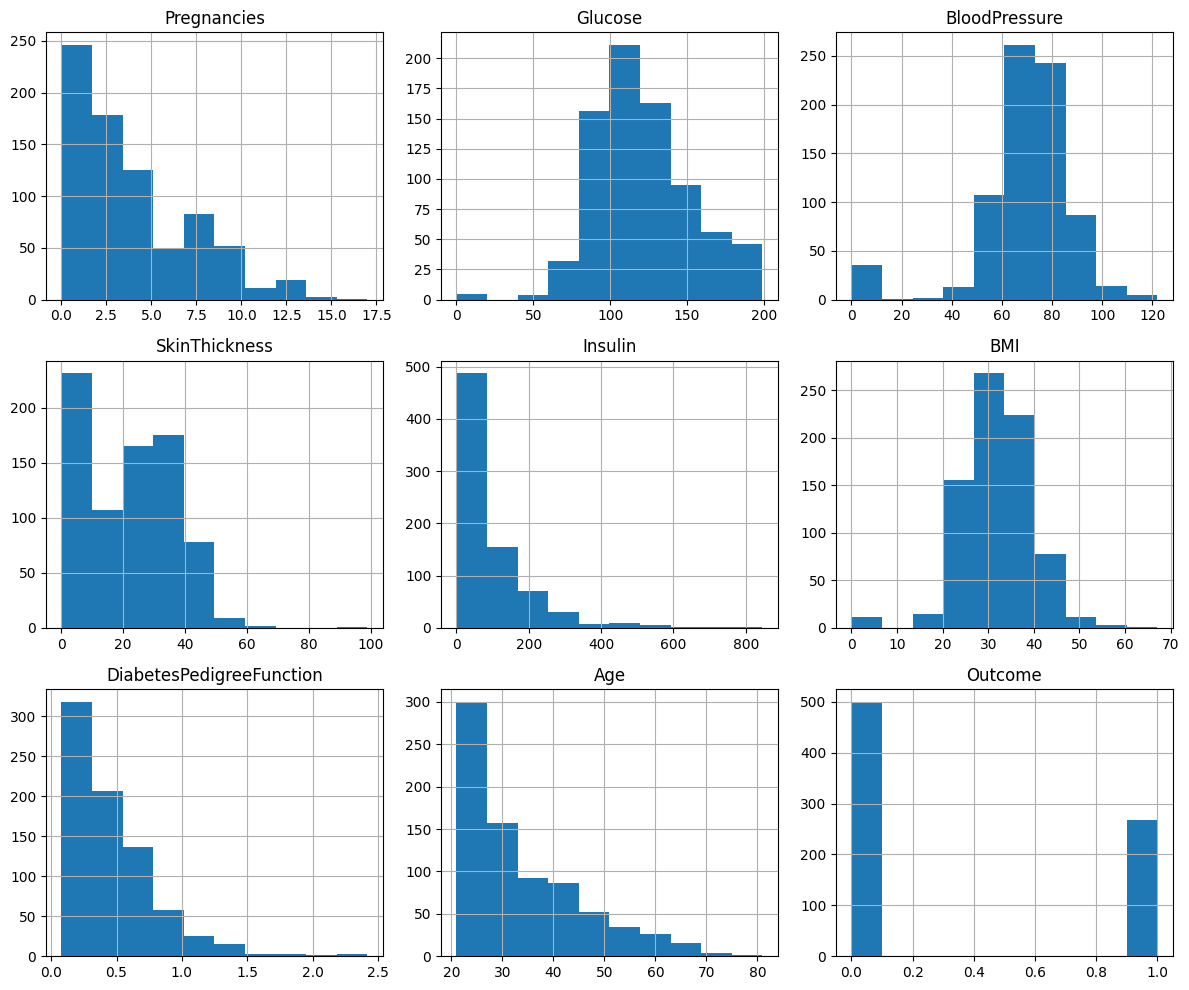

In [17]:
# Plot histograms for numerical features
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

### (ii) Box Plots for Outlier Detection 

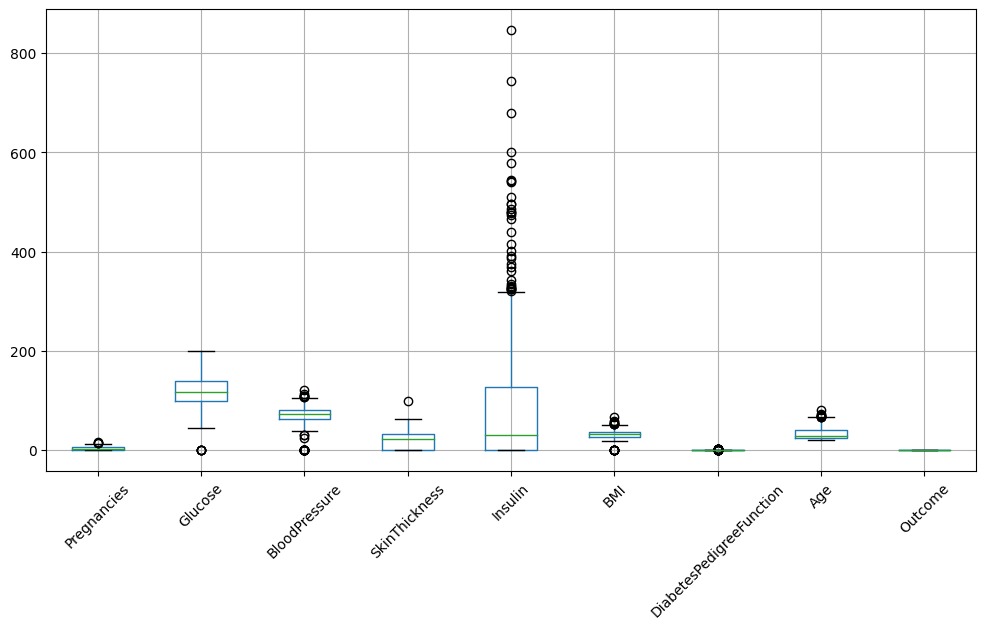

In [18]:
# Plot box plots for numerical features to detect outliers
plt.figure(figsize=(12, 6))
data.boxplot()
plt.xticks(rotation=45)
plt.show()

### (iii) Correlation Matrix

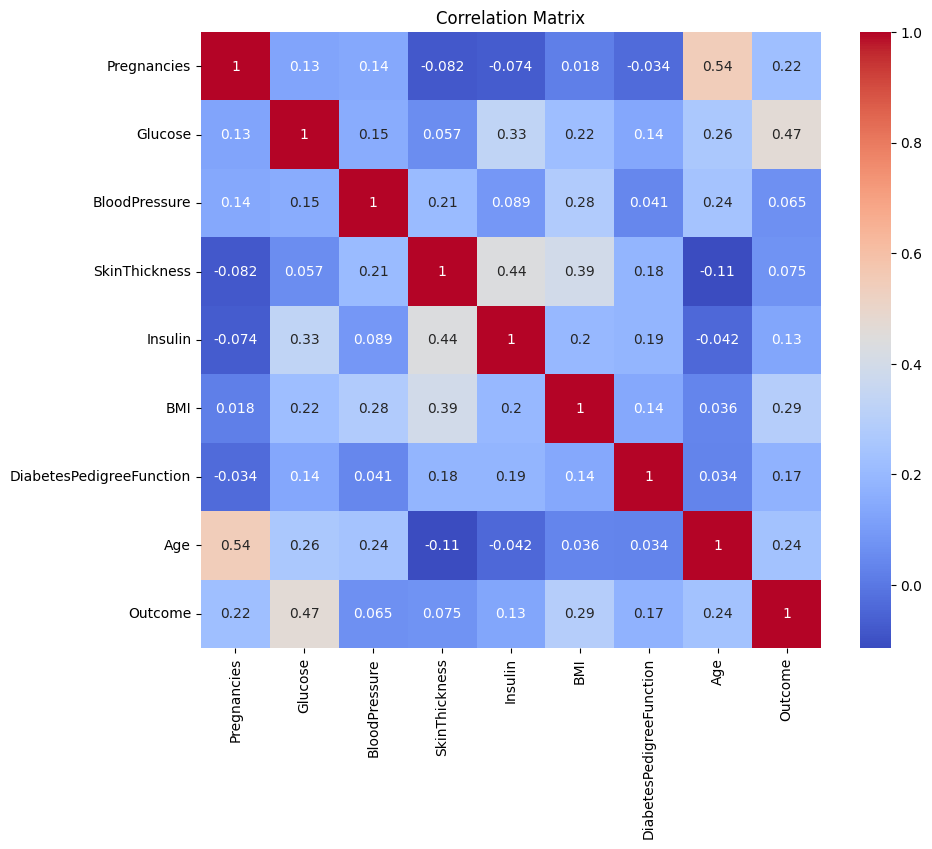

In [22]:
# Create a correlation matrix to visualize feature relationships
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### (iv) Pair Plots (Scatter Matrix) 

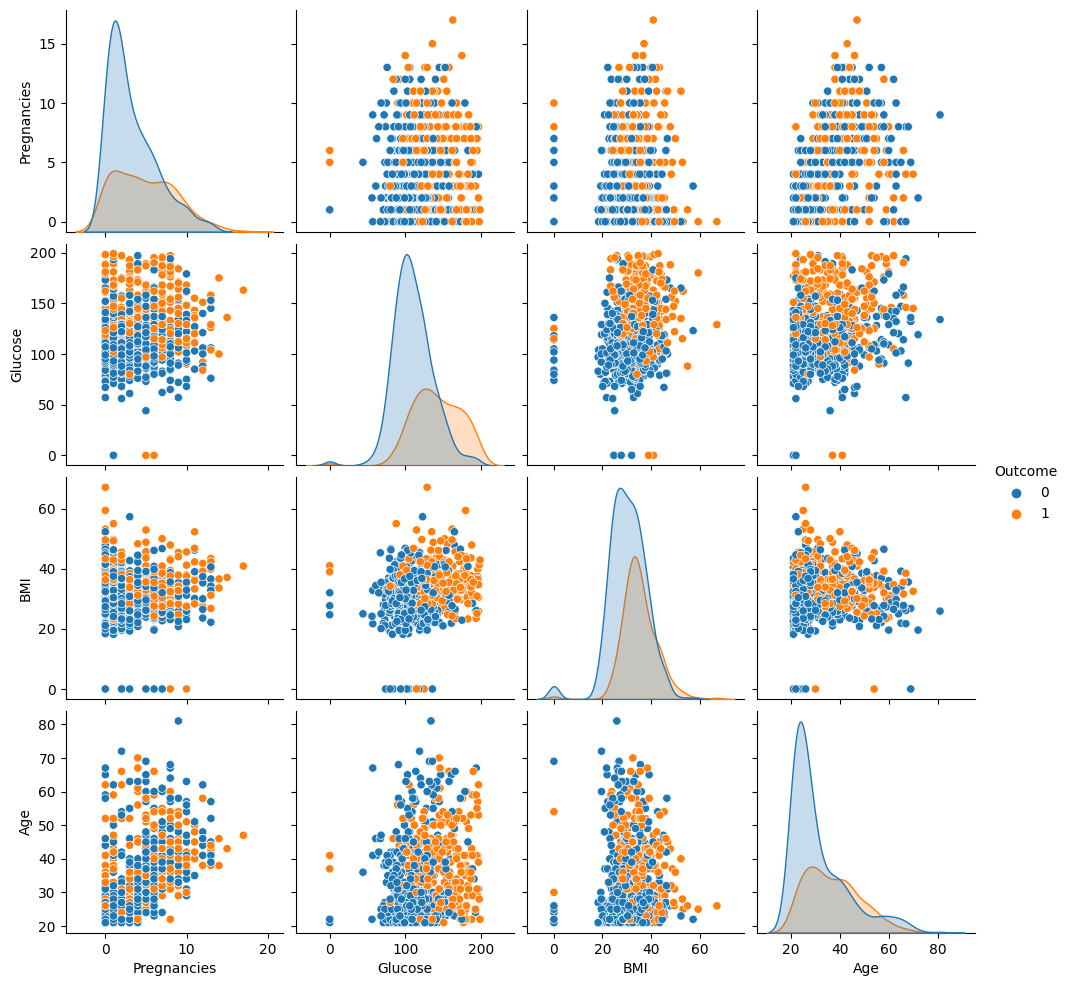

In [23]:
# Create pair plots for selected features
sns.pairplot(data, vars=['Pregnancies', 'Glucose', 'BMI', 'Age'], hue='Outcome')
plt.show()

### (v) Pairwise Scatter Plots with the Target Variable 

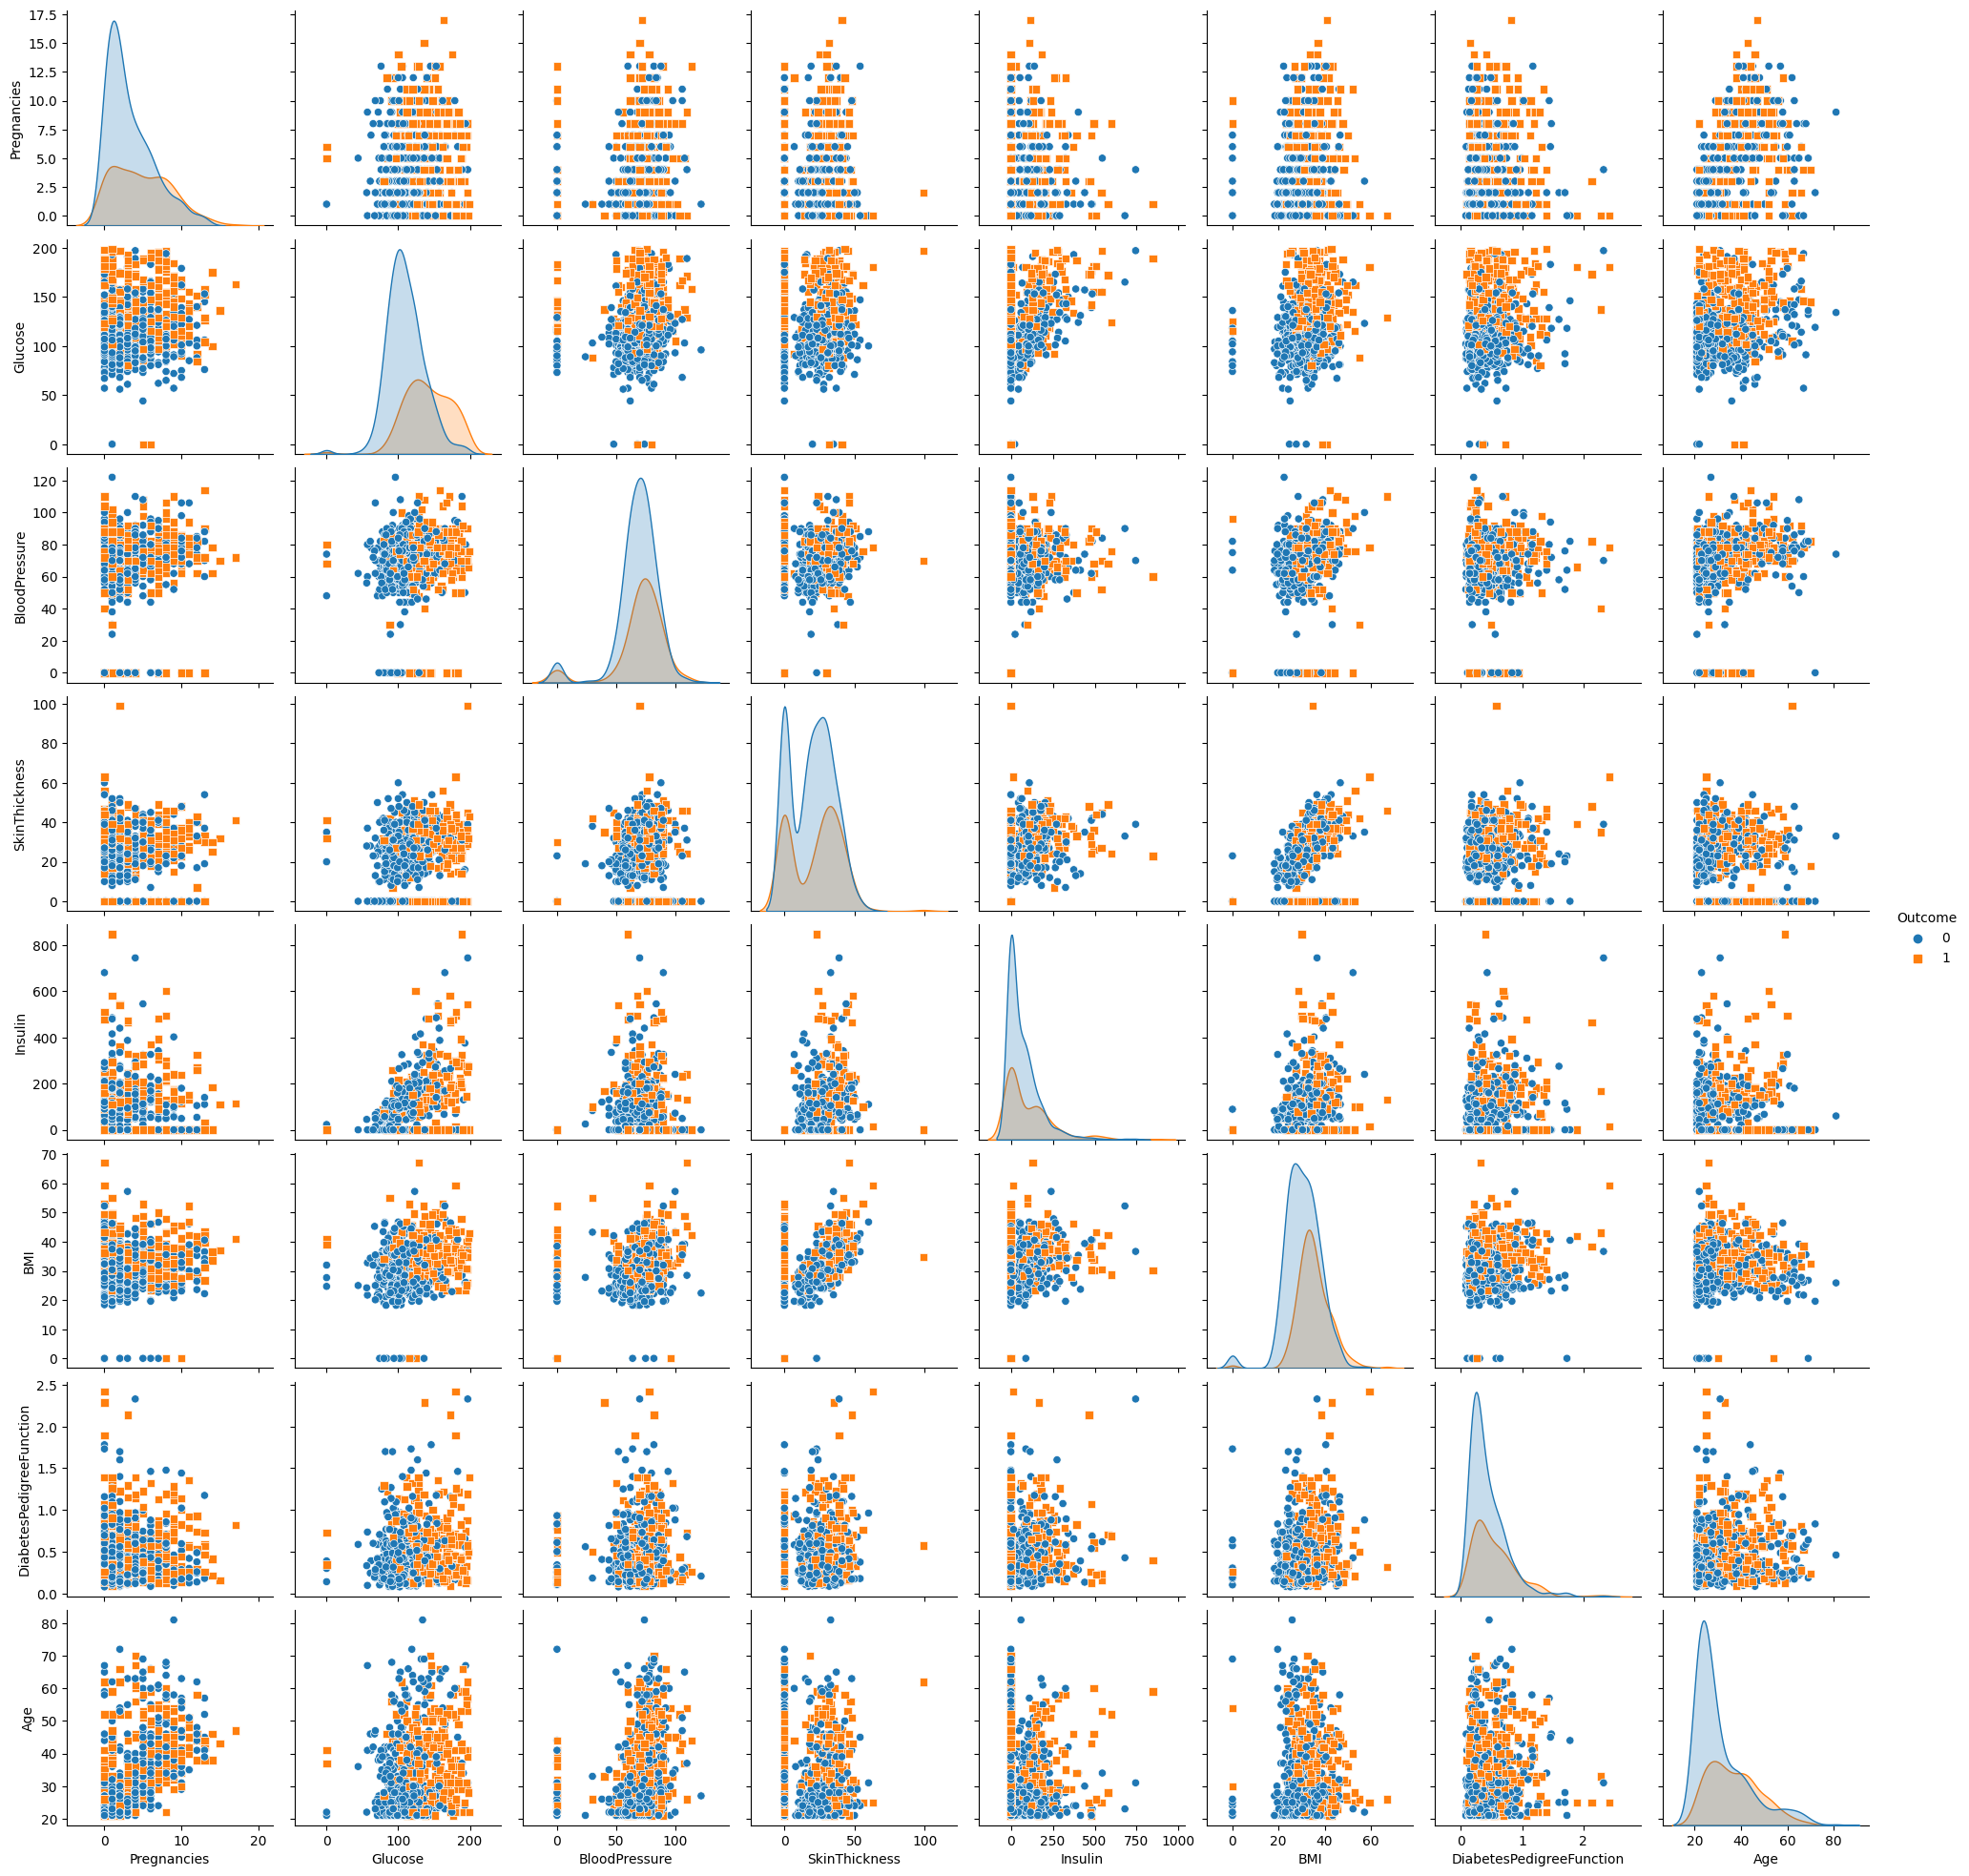

In [24]:
# Create a pair plot with hue 'Outcome'
sns.pairplot(data, hue='Outcome', markers=["o", "s"], diag_kind="kde")
plt.show()

## 4. Data Preprocessing 

In [26]:
# Split the data into features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data (optional but often beneficial)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5. Choose a Machine Learning Algorithm 

In [27]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

## 6. Train the Model 

In [28]:
# Train the model on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 7. Hyperparameter Tuning 

In [29]:
# Define a parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best estimator from the grid search
clf = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


## 8. Model Evaluation 

In [33]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\n\nConfusion Matrix:\n", conf_matrix)
print("\n\nClassification Report:\n", classification_rep)

Accuracy: 0.7467532467532467


Confusion Matrix:
 [[79 20]
 [19 36]]


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



## 9. Model Assessment

### (i) Confusion Matrix Heatmap 

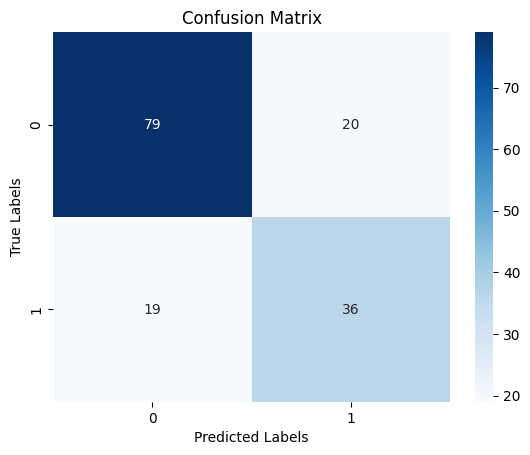

In [34]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### (ii) ROC Curve

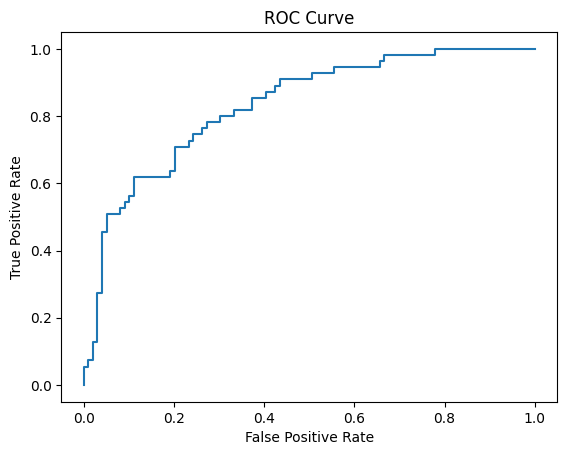

AUC-ROC Score: 0.8310376492194673


In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the AUC-ROC score
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print('AUC-ROC Score:', roc_auc)

### (iii) Precision-Recall Curve 

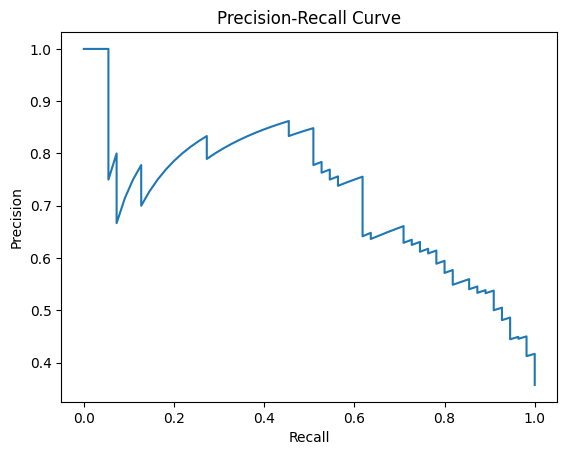

Average Precision Score: 0.7226415573248147


In [38]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Calculate the average precision score
avg_precision = average_precision_score(y_test, clf.predict_proba(X_test)[:, 1])
print('Average Precision Score:', avg_precision)

### (iv) Probability Distribution 

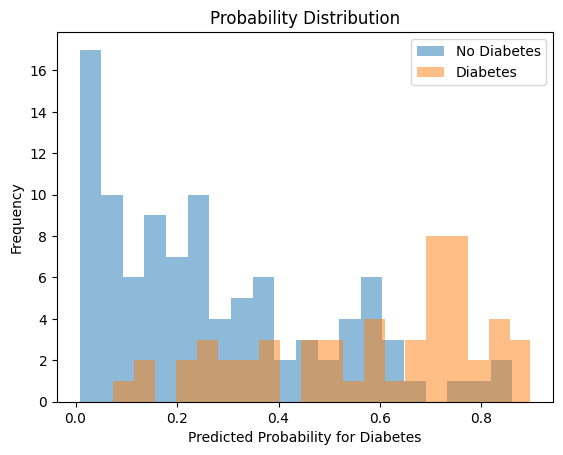

In [39]:
# Predicted probabilities for class 1 (diabetes)
probabilities = clf.predict_proba(X_test)[:, 1]

# Create histograms for predicted probabilities
plt.hist(probabilities[y_test == 0], bins=20, alpha=0.5, label='No Diabetes')
plt.hist(probabilities[y_test == 1], bins=20, alpha=0.5, label='Diabetes')
plt.xlabel('Predicted Probability for Diabetes')
plt.ylabel('Frequency')
plt.legend()
plt.title('Probability Distribution')
plt.show()